# Part2: b.
Here we do the same as Part1:a except the neural net is now implemented in numpy rather TensorFlow

#### Import Libraries
First things first, get organised with what libraries will be used later on.

In [15]:
import traceback
import sys, os, time
import pdb
import random
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 


Will be using a neural network class, so first it would be easiest to define some fucntions that will be used in the network.

## Softmax and Crossentropy.
These two functions will be to calculate the probability of the labels and the loss.

Since batches will not be used in the main function, vectors will be passed into the softmax function.

In [16]:
def softmax(z):
    
    return np.exp(z)/np.exp(z).sum()

In [17]:
def Xent(pred, true):
    
    return -np.dot(true.T,np.log(pred)).item()
    # returns a scalar value of the loss 

# Create a Neural Network Class
This is where all the heavy liffting will be done. The arguments passed through will be the data, the layers, and the number of iterations.

In [19]:
class network(object):
    
    def __init__(self,x_train, y_train, x_test,y_test, eta, layers ):
        
        #initialize the varibles of object be
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.input_num = len(y_test)
        self.eta = eta
        self.layers = layers
        self.num_layers = layers
        self.train_acc =[]
        self.train_loss = []
        self.test_acc = []
        self.test_loss =[]
        self.length = np.linspace(1,len(y_train),11)
 
            
        
        # need to create space for weights and biases
        self.W = np.random.normal(loc=0.0, scale=0.1, size=[10, 784])
        #use dimesnionality as W*x = 10x1 vector for each x image
        self.b = np.random.normal(loc=0.0, scale=0.1, size=[10, 1])
        
    def feed_forward(self,x,y):
            
        x = np.reshape(x,[784,1])
        true = np.reshape(y,[10,1])
        
        # linear transformation
        z = np.dot(self.W,x)+ self.b
            
        # apply softmax
        pred = softmax(z)
            
        # Calculate loss
        L = Xent(pred,true)
            
        return[pred,true,x,L]
        
        
    def back_prop(self,x,pred,true):
        # Back propegate through the linear layer
        # First, the gradient wrt output is calculated
        grad = pred - true
            
        #dL/dW = (grad)*x^T by the way the grad dim setup
        self.W_grad = np.dot(grad,x.T)
            
        #dL/db = dL/dy = grad
        self.b_grad = grad
            
            
    def SGD(self):
        # Want to run through all images and update weights
        # To do stochastic gradient descent, need to shuffle
            
        #dont forget to update seed in main
        random.seed(a=2)
            
        # to make sure the shuffle is the same for both x and y data
        r = random.random()
        random.shuffle(self.x_train,lambda:r)
        random.shuffle(self.y_train,lambda:r)
        freq = len(y_train)/10
            
        for i in range(len(y_train)):
            #feed forward
            [pred,true,x,L] =self.feed_forward(self.x_train[i,],self.y_train[i])
                
            #back_prop
            self.back_prop(x,pred,true)
                
            # update gradients
            self.W = self.W- self.eta*self.W_grad
            self.b = self.b -self.eta*self.b_grad
            
            # Accuracy
            if  i%freq == 0 or i == len(y_train)-1:
                errors_train = 0
                errors_test = 0
                #pdb.set_trace()
                # calculate the accuracy at different iterations
                for j in range(len(y_train)):
                    
                    [pred_train,true_train,x_train,L_train] =self.feed_forward(self.x_train[j,],self.y_train[j])
                    if np.argmax(pred_train) != np.argmax(true_train):
                        errors_train += 1
                for j in range(self.input_num):       
                    [pred_test,true_test,x_test,L_test] =self.feed_forward(self.x_test[j,],self.y_test[j])
                    if np.argmax(pred_test) != np.argmax(true_test):
                        errors_test += 1   
                
                accuracy_train = 1-(errors_train/len(y_train))
                self.train_acc.append(accuracy_train)
                self.train_loss.append(L_train)
                
                accuracy_test = 1- errors_test/self.input_num
                self.test_acc.append(accuracy_test)
                self.test_loss.append(L_test)

                print("iteration:{0:>6}, \t\t Train Accuracy:{1:6.1%}\n".format(1+i, 1-errors_train/len(y_train)))
                print("\t\t \t\t Test Accuracy:{1:6.1%}\n".format(1+i, 1- errors_test/self.input_num))
        #print(len(self.train_acc))
        #print(len(self.test_acc))                
        return(self.train_acc,self.test_acc,self.length,self.train_loss,self.test_loss)        
            

## Import data and set values

In [20]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('mnist_data/', one_hot=True)
x_train = data.train.images
y_train = data.train.labels
x_test = data.test.images
y_test = data.test.labels
#print(x_train.shape[1])

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


Have a look at the data:

In [21]:
print('The size of the data that we will be working with:')
print('train set: {} '.format(len(y_train)))
print('valid set: {} '.format(len(data.validation.labels)))
print('test set:  {} '.format(len(y_test)))


The size of the data that we will be working with:
train set: 55000 
valid set: 5000 
test set:  10000 


In [22]:
def Final_accuracy(x, labels, W,b,Train = True):
    iters = len(labels)
    errors = 0
    
    # Run through the forward stepp
    for i in range(iters):
        xi = np.reshape(x[i,],[784,1])
        true_label = np.reshape(labels[i], [10,1])
        
        z = np.dot(W,xi)+b
        y = np.argmax(softmax(z))
        if y!=np.argmax(true_label):
            errors+=1
    if Train == True:       
        print("Train Accuracy:{1:6.1%}\n".format(1+i, 1- errors/iters))
    else:print("Test Accuracy:{1:6.1%}\n".format(1+i, 1- errors/iters))    

### Create the linear network object and use SGD funciton.

In [23]:
start = time.time()
linear_network = network(x_train,y_train,x_test,y_test,0.005,1)
cycle = 1
# Could change the number of cycles to run through more data
for k in range(cycle):
    [train_acc10,test_acc10,length10,train_loss10,test_loss10] =linear_network.SGD()

    
Weights = linear_network.W
biases = linear_network.b    
Final_accuracy(x_train,y_train, Weights,biases, Train = True)
Final_accuracy(x_test,y_test, Weights,biases, Train = False)

# Save the Models
with open("models_part2/Weights2b.pkl", 'wb') as f:
        pickle.dump(Weights, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("models_part2/Biases2b.pkl", 'wb') as f:
        pickle.dump(biases, f, protocol=pickle.HIGHEST_PROTOCOL)

time_taken = time.time()- start
print('Time taken to train was: {}s'.format(time_taken))

iteration:     1, 		 Train Accuracy: 17.1%

		 		 Test Accuracy: 18.2%

iteration:  5501, 		 Train Accuracy: 85.0%

		 		 Test Accuracy: 85.6%

iteration: 11001, 		 Train Accuracy: 88.2%

		 		 Test Accuracy: 89.3%

iteration: 16501, 		 Train Accuracy: 87.4%

		 		 Test Accuracy: 88.6%

iteration: 22001, 		 Train Accuracy: 89.5%

		 		 Test Accuracy: 90.3%

iteration: 27501, 		 Train Accuracy: 89.8%

		 		 Test Accuracy: 90.7%

iteration: 33001, 		 Train Accuracy: 89.2%

		 		 Test Accuracy: 90.1%

iteration: 38501, 		 Train Accuracy: 90.1%

		 		 Test Accuracy: 90.6%

iteration: 44001, 		 Train Accuracy: 90.6%

		 		 Test Accuracy: 91.1%

iteration: 49501, 		 Train Accuracy: 90.4%

		 		 Test Accuracy: 91.0%

iteration: 55000, 		 Train Accuracy: 90.6%

		 		 Test Accuracy: 91.0%

Train Accuracy: 90.6%

Test Accuracy: 91.0%

Time taken to train was: 20.479774236679077s


### Plot Accuracy and Loss

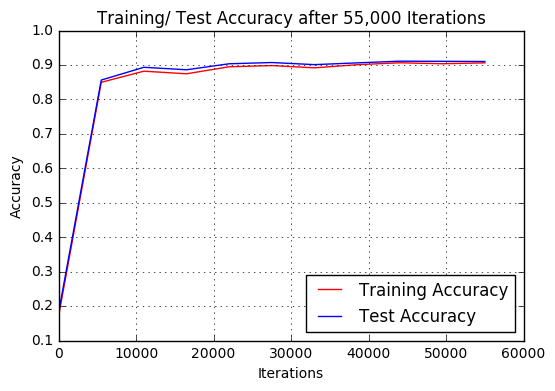

In [24]:
plt.title('Training/ Test Accuracy after 55,000 Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

plt.grid(True)


plt.plot(length10,train_acc10,color="red", label="Training Accuracy")
plt.plot(length10,test_acc10,color="blue", label="Test Accuracy")

plt.legend( loc='lower right')
plt.savefig("Accuracy_part2b.png", bbox_inches='tight')
plt.show()

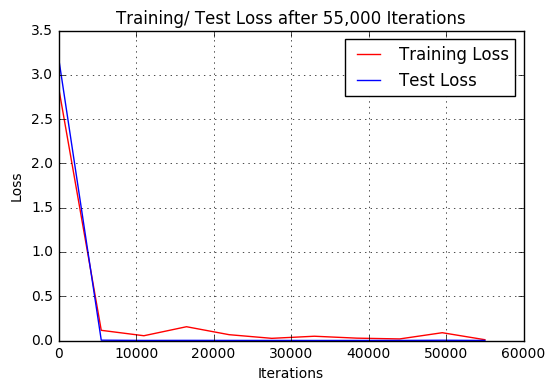

In [25]:
plt.title('Training/ Test Loss after 55,000 Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.grid(True)
plt.plot(length10,train_loss10,color="red", label="Training Loss")
plt.plot(length10,test_loss10,color="blue", label="Test Loss")

plt.legend( loc='upper right')
plt.savefig("Loss_part2b.png", bbox_inches='tight')
plt.show()

### Confusion Matrix

In [26]:
def compute_confusion_mat(x_data, y_data, w, b):
    
    n = len(y_data)
    y_pred = []
    y_true = []
    
    for i in range(n):
        x = np.reshape(x_data[i, ], [784, 1])
        y = softmax(np.dot(w, x) + b)
        y_pred.append(np.argmax(y))
        y_true.append(np.argmax(y_data[i]))
    #pdb.set_trace()
    return confusion_matrix(np.array(y_true), np.array(y_pred))

[[ 964    0    1    2    0    2    7    2    2    0]
 [   0 1107    3    2    0    1    4    2   16    0]
 [  15    4  903   16    8    2   17   20   42    5]
 [   3    0   16  923    0   17    2   22   23    4]
 [   2    2    4    2  894    1   17    5   11   44]
 [  13    4    7   56    9  717   16   13   46   11]
 [  14    3    4    2    3   10  917    3    2    0]
 [   2   10   22    7    7    0    0  960    3   17]
 [  12    9    8   33    7   18   13   21  847    6]
 [  11    7    3   11   26    5    0   69    9  868]]


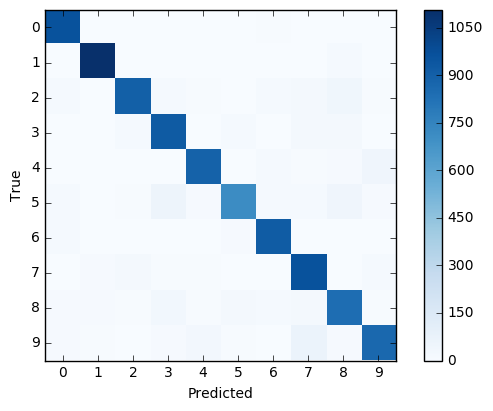

In [27]:
# Confusion matrix
confusion_mat = compute_confusion_mat(x_test, y_test, linear_network.W, linear_network.b)
print(confusion_mat)
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("CM_part2_b.png", bbox_inches='tight')
plt.show()

## Load model.
Run this to to load the weights and biaes that will produce the final accuracy. This is to check, if you like, if the results are the same as they are in the report.

In [10]:
import traceback
import sys, os, time
import pdb
import random
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 


In [11]:
#Weights = np.load("models_part2/Weights_2b.dat")
#biases = np.load("models_part2/biases_2b.dat")
with open("models_part2/Weights2b.pkl", 'rb') as f:
    weights = pickle.load(f)
with open("models_part2/Biases2b.pkl", 'rb') as f:
    biases = pickle.load(f)

In [12]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('mnist_data/', one_hot=True)
x_train = data.train.images
y_train = data.train.labels
x_test = data.test.images
y_test = data.test.labels
#print(x_train.shape[1])

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [13]:
def softmax(z):
    
    return np.exp(z)/np.exp(z).sum()

In [14]:
def accuracy(x, labels, W,b,Train = True):
    iters = len(labels)
    errors = 0
    
    for i in range(iters):
        xi = np.reshape(x[i,],[784,1])
        true_label = np.reshape(labels[i], [10,1])
        
        z = np.dot(W,xi)+b
        y = np.argmax(softmax(z))
        if y!=np.argmax(true_label):
            errors+=1
    if Train == True:       
        print("Train Accuracy:{1:6.1%}\n".format(1+i, 1- errors/iters))
    else:print("Test Accuracy:{1:6.1%}\n".format(1+i, 1- errors/iters))    

In [15]:
accuracy(x_train,y_train, weights,biases, Train = True)
accuracy(x_test,y_test, weights,biases, Train = False)

Train Accuracy: 90.7%

Test Accuracy: 91.0%



In [16]:
def compute_confusion_mat(x_data, y_data, w, b):
    
    n = len(y_data)
    y_pred = []
    y_true = []
    
    for i in range(n):
        x = np.reshape(x_data[i, ], [784, 1])
        y = softmax(np.dot(w, x) + b)
        y_pred.append(np.argmax(y))
        y_true.append(np.argmax(y_data[i]))
    #pdb.set_trace()
    return confusion_matrix(np.array(y_true), np.array(y_pred))

In [17]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    #plt.tight_layout()

    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.savefig("CM_part2_b.png", bbox_inches='tight')

    plt.show()

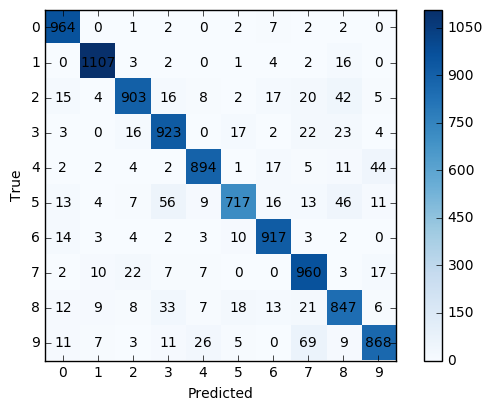

In [18]:
conf_mat = compute_confusion_mat(x_test, y_test, weights, biases)
digits = np.array([np.linspace(0,9,10)])
plot_confusion_matrix(conf_mat, digits)